In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import plotly.express as px

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



tracks = pd.read_csv('../../Dataset/data_processed.csv')
tracks.head()
tracks.describe()
mean_popularity = 60

tracks["popularity"] = [ 1 if i >= mean_popularity else 0 for i in tracks.popularity ]

tracks.popularity.value_counts()  

y = tracks["popularity"].values
X = tracks.drop(["popularity", "release_date"],axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [40]:
X.shape, y.shape

((381292, 26), (381292,))

In [41]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
mlp_model = MLPClassifier()
lgbm_model = LGBMClassifier()
xgboost_model = XGBClassifier()

In [43]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [44]:

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [46]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier()

In [47]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [49]:
log_acc = log_model.score(X_test, y_test)

In [50]:
knn_acc = knn_model.score(X_test, y_test)

In [51]:
mlp_acc = mlp_model.score(X_test, y_test)

In [52]:
lgbm_acc = lgbm_model.score(X_test, y_test)
xgboost_acc = xgboost_model.score(X_test, y_test)

In [53]:
print("Logistic Regression Accuracy:", log_acc)
print("K-Nearest-Neighbors Accuracy:", knn_acc)
print("Multi-layer Perceptron Accuracy:", mlp_acc)
print("Light Gradient Boosting Machine Accuracy:", lgbm_acc)
print("eXtreme Gradient Boosting Accuracy:", xgboost_acc)

Logistic Regression Accuracy: 0.9327817044545562
K-Nearest-Neighbors Accuracy: 0.9261070824427281
Multi-layer Perceptron Accuracy: 0.932230949789533
Light Gradient Boosting Machine Accuracy: 0.9331095346123081
eXtreme Gradient Boosting Accuracy: 0.9329521761365872


In [54]:
fig = px.bar(
    x=["Logistic Regression", "K-Nearest-Neighbors","Multi-layer Perceptron Accuracy",  "Light Gradient Boosting Machine Accuracy", "eXtreme Gradient Boosting Accuracy:"],
    y=[log_acc, knn_acc, mlp_acc, lgbm_acc,xgboost_acc],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Multi-layer Perceptron Accuracy", "Light Gradient Boosting Machine Accuracy", "eXtreme Gradient Boosting Accuracy:"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()

In [55]:
# Make predictions on the test data
y_pred_log = log_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_mlp = mlp_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_xg = xgboost_model.predict(X_test)

In [56]:
# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log))
print("Classification Report: \n", classification_report(y_test, y_pred_log))



Accuracy:  0.9327817044545562
Confusion Matrix: 
 [[71074    79]
 [ 5047    59]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     71153
           1       0.43      0.01      0.02      5106

    accuracy                           0.93     76259
   macro avg       0.68      0.51      0.49     76259
weighted avg       0.90      0.93      0.90     76259



In [57]:
# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report: \n", classification_report(y_test, y_pred_knn))


Accuracy:  0.9261070824427281
Confusion Matrix: 
 [[70337   816]
 [ 4819   287]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     71153
           1       0.26      0.06      0.09      5106

    accuracy                           0.93     76259
   macro avg       0.60      0.52      0.53     76259
weighted avg       0.89      0.93      0.90     76259



In [36]:

# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_mlp))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report: \n", classification_report(y_test, y_pred_mlp))



Accuracy:  0.9341717043234241
Confusion Matrix: 
 [[70898   255]
 [ 4765   341]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     71153
           1       0.57      0.07      0.12      5106

    accuracy                           0.93     76259
   macro avg       0.75      0.53      0.54     76259
weighted avg       0.91      0.93      0.91     76259



In [37]:
# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_lgbm))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lgbm))
print("Classification Report: \n", classification_report(y_test, y_pred_lgbm))



Accuracy:  0.9342634967675947
Confusion Matrix: 
 [[70958   195]
 [ 4818   288]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     71153
           1       0.60      0.06      0.10      5106

    accuracy                           0.93     76259
   macro avg       0.77      0.53      0.53     76259
weighted avg       0.91      0.93      0.91     76259



In [38]:
# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_xg))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_xg))
print("Classification Report: \n", classification_report(y_test, y_pred_xg))

Accuracy:  0.9345126476874861
Confusion Matrix: 
 [[70830   323]
 [ 4671   435]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     71153
           1       0.57      0.09      0.15      5106

    accuracy                           0.93     76259
   macro avg       0.76      0.54      0.56     76259
weighted avg       0.91      0.93      0.91     76259



In [29]:
# Plot ROC curve
from sklearn.metrics import roc_curve
y_pred_logreg = log_model.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test,  y_pred_logreg)

y_pred_knn = knn_model.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test,  y_pred_knn)

y_pred_mlp = mlp_model.predict_proba(X_test)[::,1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test,  y_pred_mlp)

y_pred_lgbm = lgbm_model.predict_proba(X_test)[::,1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test,  y_pred_lgbm)

y_pred_xgb = xgboost_model.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test,  y_pred_xgb)


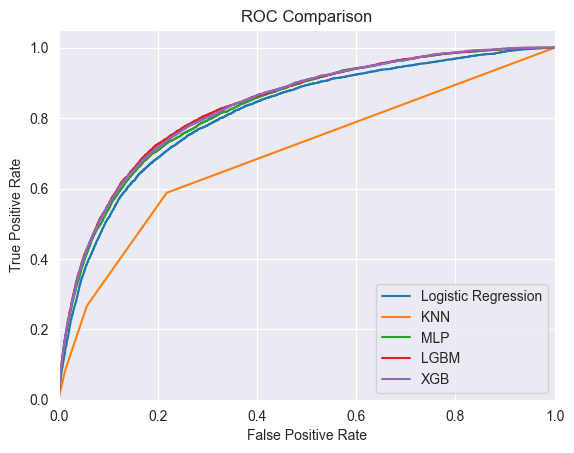

In [30]:
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_mlp, tpr_mlp, label='MLP')
plt.plot(fpr_lgbm, tpr_lgbm, label='LGBM')
plt.plot(fpr_xgb, tpr_xgb, label='XGB')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison')
plt.legend(loc="lower right")
plt.show()

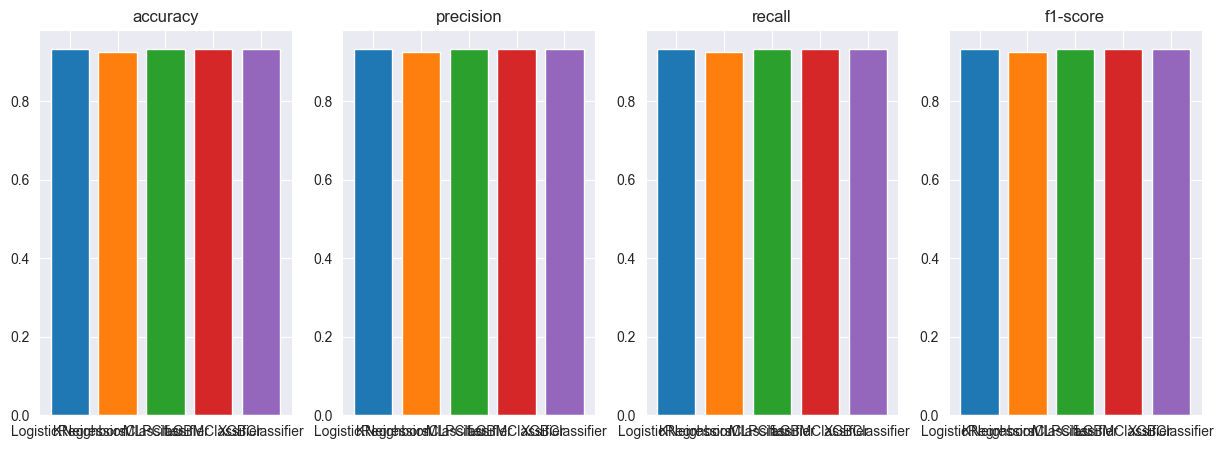

In [31]:
# Create a list of models
models = [log_model, knn_model, mlp_model, lgbm_model, xgboost_model]

# Define the evaluation metrics
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# Plot the evaluation metrics for all models
fig, ax = plt.subplots(1, len(metrics), figsize=(15,5))
for i, metric in enumerate(metrics):
    ax[i].set_title(metric)
    for j, model in enumerate(models):
        # Get the evaluation metric for the current model
        score = model.score(X_test, y_test)
        ax[i].bar(model.__class__.__name__, score)

plt.show()